In [2]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns

In [3]:
import re

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
DATA_PATH = '../chatbot__fragrance_recommendation/data/noon_perfumes_dataset.csv'
data = pd.read_csv(DATA_PATH)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1003 non-null   int64  
 1   brand               1003 non-null   object 
 2   name                1003 non-null   object 
 3   old_price           1003 non-null   float64
 4   new_price           1003 non-null   float64
 5   ml                  1003 non-null   int64  
 6   concentration       1003 non-null   object 
 7   department          1003 non-null   object 
 8   scents              1003 non-null   object 
 9   base_note           1003 non-null   object 
 10  middle_note         1003 non-null   object 
 11  item_rating         1003 non-null   float64
 12  seller              1003 non-null   object 
 13  seller_rating       1003 non-null   float64
 14  num_seller_ratings  1003 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 117.7+

In [7]:
df = pd.DataFrame(data)

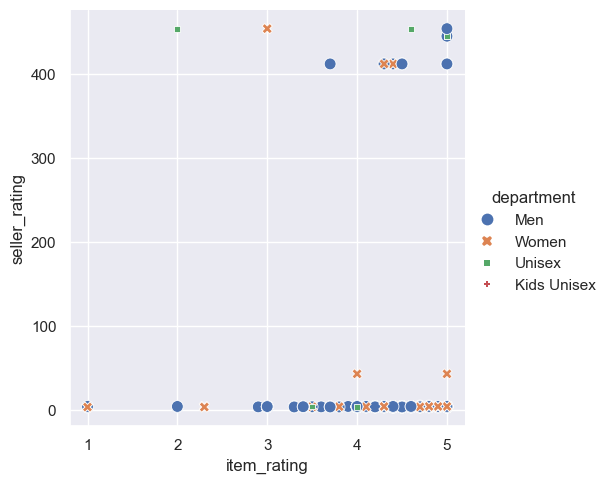

In [8]:
sns.set_theme()
sns.relplot(
    data=df,
    x="item_rating", y="seller_rating",
    hue="department", style="department", size="department",
)

In [9]:
df['seller_rating'].unique()

array([  4.2,  43. ,   3.7,   3.9,   3.8,   3.6,   3.5,   4.3,   4.4,
         4.1,   4.8, 412. , 454. , 445. ,   4. ])

In [10]:
def fix_rating(r):
    if r > 5:
        if r < 100:
            r = r/10
        elif r > 100:
            r = r/100
    return r
        
df['seller_rating'] = df['seller_rating'].apply(fix_rating)

In [11]:
print(df[df['seller_rating'] > 5])

Empty DataFrame
Columns: [Unnamed: 0, brand, name, old_price, new_price, ml, concentration, department, scents, base_note, middle_note, item_rating, seller, seller_rating, num_seller_ratings]
Index: []


In [12]:
df.nunique()

Unnamed: 0            1003
brand                  160
name                   594
old_price              438
new_price              644
ml                      28
concentration            5
department               4
scents                  22
base_note              739
middle_note            726
item_rating             23
seller                 117
seller_rating           14
num_seller_ratings      60
dtype: int64

In [17]:
df['brand'].unique()

array(['PACO RABANNE', 'Roberto Cavalli', 'S.T.Dupont', 'GUESS',
       'HUGO BOSS', 'DORALL COLLECTION', 'GUCCI', 'Yves Saint Laurent',
       'CERRUTI 1881', 'Calvin Klein', 'Rasasi', 'MONTALE', 'CHLOE',
       'NARCISO RODRIGUEZ', 'BOUCHERON', 'Alina Corel', 'Revlon',
       'TED LAPIDUS', 'Britney Spears', 'Van Cleef & Arpels',
       'Estee Lauder', 'Geoffrey Beene', 'Dolce & Gabbana', 'Mancera',
       'Dior', 'BURBERRY', 'AIGNER', 'BENTLEY', 'VERSACE',
       'Juicy Couture', 'Laura Mars', 'GIORGIO ARMANI', 'HERMES',
       'Elizabeth Arden', 'Benetton', 'Giorgio Beverly Hills', 'Guerlain',
       'Jean Paul GAULTIER', 'Ajmal', 'J.CASANOVA',
       'UNITED COLORS OF BENETTON', 'YSL', 'TOMMY HILFIGER',
       'RALPH LAUREN', 'EMPORIO ARMANI', 'armani', 'VALENTINO',
       'Ard Al Zaafaran', 'DKNY', 'CAROLINA HERRERA', 'ELIE SAAB',
       'MONTBLANC', 'LACOSTE', 'LE CHAMEAU', 'AVON',
       'Salvatore Ferragamo', 'Carrera', 'Sedr Al-Khaleej Perfumes',
       'Dunhill', 'TRUSSARDI'

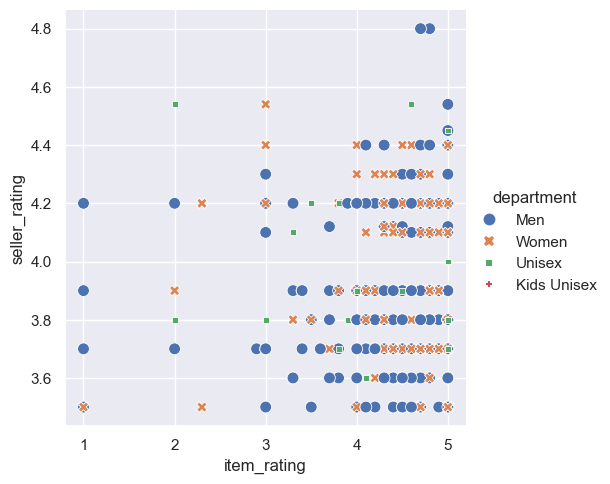

In [155]:
sns.set_theme()
sns.relplot(
    data=df,
    x="item_rating", y="seller_rating",
    hue="department", style="department", size="department",
)

In [156]:
df["department"] = df["department"].str.lower().replace("kids unisex", "unisex")
print(df["department"].value_counts())


department
women     503
men       433
unisex     67
Name: count, dtype: int64


In [157]:
df['concentration'] = df['concentration'].str.lower().replace('pdt', 'edt')
print(df['concentration'].value_counts())

concentration
edt    506
edp    494
oil      2
edc      1
Name: count, dtype: int64


In [158]:
df['price_per_ml'] = df['new_price']/df['ml']

In [159]:
df.head()

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,price_per_ml
0,0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,edt,men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K,2.4455
1,1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,edp,women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K,2.1590
2,2,S.T.Dupont,Royal Amber,265.0,186.90,100,edp,unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K,1.8690
3,3,GUESS,Seductive Blue,290.0,103.20,100,edt,men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K,1.0320
4,4,Roberto Cavalli,Uomo,260.0,94.95,50,edp,women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K,1.8990


In [160]:
def normalize_text(text):
    if pd.isna(text):
        return []
    data = re.split(r',|\s+&', str(text), flags=re.I)
    return [p.strip().title() for p in data if p.strip()]

In [161]:
def split_scent(text):
    if not isinstance(text, str):
        return []
    parts = re.split(r',|\s+and\s+|\s*&\s*" "', text, flags=re.I)
    return [p.strip().title() for p in parts if p.strip()]

In [163]:
def add_scent_column(df):
    df_copy = df.copy()
    
    # Clean scents column
    df_copy['scents'] = df_copy['scents'].str.replace(r'\band\b', ' ', case=False, regex=True)
    df_copy['scents'] = df_copy['scents'].str.replace(',', ' ', case=False, regex=True)
    df_copy['scents'] = df_copy['scents'].str.replace(r'\s+', ' ', case=False, regex=True)
    
    # Create binary features for each scent
    vectorizer = CountVectorizer(tokenizer=str.split, binary=True)
    scents_matrix = vectorizer.fit_transform(df_copy['scents'])
    scents_df = pd.DataFrame(scents_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Combine with original dataframe
    df_final = pd.concat([df_copy, scents_df], axis=1)
    
    return df_final


In [ ]:
def add_gender_column(df):
    df_copy = df.copy()
    
    # Create gender dummy variables (Men/Women only)
    gender_df = pd.get_dummies(df_copy["department"], dtype=int)
    
    # Combine with original dataframe
    df_final = pd.concat([df_copy, gender_df], axis=1)
    
    return df_final

In [165]:
def add_budget_range_column(df):
    df_copy = df.copy()
    
    # Calculate price per ml
    df_copy['price_per_ml'] = df_copy['new_price'] / df_copy['ml']
    
    # Calculate price per 100ml for mapping
    df_copy['price_per_100ml'] = df_copy['price_per_ml'] * 100
    
    # Define budget mapping function
    def map_budget_range(price_per_100ml):
        if price_per_100ml < 50:
            return 1
        elif 50 <= price_per_100ml < 100:
            return 2
        elif 100 <= price_per_100ml < 150:
            return 3
        elif 150 <= price_per_100ml < 200:
            return 4
        elif 200 <= price_per_100ml < 300:
            return 5
        else:  # 300+
            return 6
    
    # Apply budget range mapping
    df_copy['budget_range'] = df_copy['price_per_100ml'].apply(map_budget_range)
    
    # Labels
    budget_labels = {
        1: '<50',
        2: '50-100', 
        3: '100-150',
        4: '150-200',
        5: '200-300',
        6: '300+'
    }
    df_copy['budget_range_label'] = df_copy['budget_range'].map(budget_labels)
    
    return df_copy


In [166]:
def add_season_concentration_column(df):
    df_copy = df.copy()
    
    def map_season_concentration(concentration):
        conc = str(concentration).lower().strip()
        
        # Spring/Summer 
        if conc in ['edc', 'edt']:
            return 1  
        # Fall/Winter
        elif conc in ['edp', 'oil']:
            return 2
        else:
            print(f"Warning: Unknown concentration '{concentration}', defaulting to Fall/Winter")
            return 2
        
    df_copy['season_concentration'] = df_copy['concentration'].apply(map_season_concentration)
    return df_copy

In [167]:
def process_perfume_data(df):
    # Apply all transformations in sequence
    df_final = df.copy()
    df_final = add_scent_column(df_final)
    df_final = add_gender_column(df_final)  
    df_final = add_budget_range_column(df_final)
    df_final = add_season_concentration_column(df_final)
    
    return df_final

In [168]:
df_copy = df.copy()
df_test = process_perfume_data(df_copy)

csv_path = "../chatbot__fragrance_recommendation/data/test_data.csv"
df_test.to_csv(csv_path, index=False)

csv_path

/Users/ellieryus/[/Users/Douwnloads/anaconda3]/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


'../chatbot__fragrance_recommendation/data/test_data.csv'

In [169]:
# Apply scent column transformation
df_copy = df.copy()
df_scent = add_scent_columns(df_copy)

# Save to CSV and Excel
csv_path = "../chatbot__fragrance_recommendation/data/scent_data.csv"
excel_path = "../chatbot__fragrance_recommendation/data/scent_data.xlsx"

df_scent.to_csv(csv_path, index=False)
df_scent.to_excel(excel_path, index=False)

csv_path, excel_path

[['Woody'], ['Floral'], ['Arabian'], ['Spicy'], ['Arabian'], ['Arabian'], ['Oriental'], ['Fruity'], ['Floral'], ['Arabian'], ['Fresh'], ['Citrus'], ['Fruity'], ['Floral'], ['Woody'], ['Floral'], ['Woody'], ['Fresh'], ['Floral'], ['Floral'], ['Floral'], ['Woody'], ['Woody'], ['Woody'], ['Vanilla'], ['Fruity'], ['Woody'], ['Floral'], ['Musk'], ['Spicy'], ['Woody'], ['Woody'], ['Oriental', 'Floral'], ['Oriental'], ['Woody'], ['Floral'], ['Spicy'], ['Spicy'], ['Floral'], ['Floral'], ['Floral'], ['Citrus'], ['Citrus'], ['Floral'], ['Vanilla'], ['Floral'], ['Floral'], ['Vanilla'], ['Floral'], ['Citrus'], ['Floral'], ['Fresh'], ['Fresh'], ['Citrus'], ['Arabian'], ['Floral'], ['Floral'], ['Fruity'], ['Floral'], ['Floral'], ['Floral'], ['Floral'], ['Floral'], ['Woody'], ['Fruity'], ['Spicy'], ['Woody'], ['Citrus'], ['Fresh'], ['Spicy'], ['Woody'], ['Spicy'], ['Woody'], ['Floral'], ['Floral'], ['Citrus'], ['Fresh'], ['Floral'], ['Woody'], ['Sweet Aromatic'], ['Woody'], ['Floral'], ['Fresh'], ['F

('../chatbot__fragrance_recommendation/data/scent_data.csv',
 '../chatbot__fragrance_recommendation/data/scent_data.xlsx')

In [170]:
df['concentration'].unique()

array(['edt', 'edp', 'edc', 'oil'], dtype=object)

In [180]:
user_profile = {'name': 'ellie',
 'gender': {'Women': True, 'Men': False, 'Unisex': False},
 'target': {'Myself': True, 'Gift': False},
 'season': {'Spring / Summer': True, 'Fall / Winter': False},
 'occasion': {'Casual': True,
  'Formal': False,
  'Romantic': False,
  'Party': False,
  'Work': False},
 'fresh-scent-self': {'Fresh (clean, crisp)': True,
  'Citrus (zesty, bright)': False,
  'Fruity (sweet, lively)': False},
 'brand-category': {'Luxury: (Chanel, Dior, Gucci, etc.)': False,
  'Mid-Range: (Hugo Boss, Calvin Klein, Marc Jacobs, etc.)': True,
  'Designer: (Versace, Michael Kors, Coach, etc.)': False,
  'Niche: (Arabian Oud, Rasasi, Ajmal, etc.)': False,
  'Affordable: (Avon, Revlon, Elizabeth Arden, etc.)': False},
 'budget-midrange': {'$50 - $100': True, '$100 - $150': False, '$150+': False}}

In [181]:
for key, value in user_profile.items():
    if key != 'name':
        for k, v in value.items():
            if v == True:
                print(f"{key}: {k}")
    else:
        print(f"{key}: {value}")

name: ellie
gender: Women
target: Myself
season: Spring / Summer
occasion: Casual
fresh-scent-self: Fresh (clean, crisp)
brand-category: Mid-Range: (Hugo Boss, Calvin Klein, Marc Jacobs, etc.)
budget-midrange: $50 - $100


In [ ]:
df_calculate = df.drop(columns='')

In [193]:
df['scents'].unique()

array(['Woody', 'Floral', 'Arabian', 'Spicy', 'Oriental', 'Fruity',
       'Fresh', 'Citrus', 'Vanilla', 'Musk', 'Oriental, Floral',
       'Sweet Aromatic', 'Aromatic', 'Woody, Sweet', 'Aromatic,Citrus',
       'Clean', 'Woody, Musky', 'Floral and Oriental', 'Jasmine',
       'Woody And Spicy', 'Rose, Floral', 'Sandalwood'], dtype=object)

In [194]:
df_processed = process_perfume_data(df)

/Users/ellieryus/[/Users/Douwnloads/anaconda3]/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [201]:
print(df_processed.columns)

Index(['Unnamed: 0', 'brand', 'name', 'old_price', 'new_price', 'ml',
       'concentration', 'department', 'scents', 'base_note', 'middle_note',
       'item_rating', 'seller', 'seller_rating', 'num_seller_ratings',
       'price_per_ml', 'arabian', 'aromatic', 'citrus', 'clean', 'floral',
       'fresh', 'fruity', 'jasmine', 'musk', 'musky', 'oriental', 'rose',
       'sandalwood', 'spicy', 'sweet', 'vanilla', 'woody', 'men', 'unisex',
       'women', 'price_per_100ml', 'budget_range', 'budget_range_label',
       'season_concentration'],
      dtype='object')


In [198]:
original_cols = ['Unnamed: 0', 'brand', 'name', 'old_price', 'new_price', 'ml', 
                    'concentration', 'department', 'scents', 'base_note', 'middle_note', 
                    'item_rating', 'seller', 'seller_rating', 'num_seller_ratings', 
                    'price_per_ml', 'price_per_100ml', 'budget_range_label']

feature_cols = [col for col in df_processed.columns if col not in original_cols]

print(f"Total feature columns: {len(feature_cols)}")


Total feature columns: 22


In [ ]:
def transform_chatbot_user_profile(user_profile, processed_df):
    # Get all feature columns (exclude original metadata columns)
    original_cols = ['Unnamed: 0', 'brand', 'name', 'old_price', 'new_price', 'ml', 
                     'concentration', 'department', 'scents', 'base_note', 'middle_note', 
                     'item_rating', 'seller', 'seller_rating', 'num_seller_ratings', 
                     'price_per_ml', 'price_per_100ml', 'budget_range_label']
    
    feature_cols = [col for col in processed_df.columns if col not in original_cols]
    
    print(f"Total feature columns: {len(feature_cols)}")
    
    # Initialize user vector
    user_vector = {col: 0 for col in feature_cols}
    
    # 1. GENDER - Extract from boolean dictionary
    gender_data = user_profile.get('gender', {})
    for gender_option, is_selected in gender_data.items():
        if is_selected and gender_option.lower() in user_vector:
            user_vector[gender_option.lower()] = 1
            print(f"Gender set: {gender_option.lower()} = 1")
    
    # 2. SEASON - Extract from season choice
    season_data = user_profile.get('season', {})
    if 'season_concentration' in user_vector:
        spring_summer_selected = season_data.get('Spring / Summer', False)
        fall_winter_selected = season_data.get('Fall / Winter', False)
        
        if spring_summer_selected:
            user_vector['season_concentration'] = 1
        elif fall_winter_selected:
            user_vector['season_concentration'] = 2
    
    # 3. BUDGET - Extract from brand-specific budget
    if 'budget_range' in user_vector:
        budget_value = 2  # Default to mid-range
        
        # Check luxury budget
        luxury_budget = user_profile.get('budget-luxury', {})
        for budget_option, is_selected in luxury_budget.items():
            if is_selected:
                if '$100 - $200' in budget_option:
                    budget_value = 4
                elif '$200 - $300' in budget_option:
                    budget_value = 5
                elif '$300+' in budget_option:
                    budget_value = 6
                    
        # Check mid-range budget
        midrange_budget = user_profile.get('budget-midrange', {})
        for budget_option, is_selected in midrange_budget.items():
            if is_selected:
                if '$50 - $100' in budget_option:
                    budget_value = 2
                elif '$100 - $150' in budget_option:
                    budget_value = 3
                elif '$150+' in budget_option:
                    budget_value = 4
                    
        # Check affordable budget
        affordable_budget = user_profile.get('budget-affordable', {})
        for budget_option, is_selected in affordable_budget.items():
            if is_selected:
                if 'Under $50' in budget_option:
                    budget_value = 1
                elif '$50 - $75' in budget_option:
                    budget_value = 2
                elif '$75+' in budget_option:
                    budget_value = 2
        
        user_vector['budget_range'] = budget_value
        print(f"Budget range set: {budget_value}")
    
    # 4. SCENT PREFERENCES - Handle all scent-related attributes
    activated_scents = []
    
    # Define scent mappings for different question types
    scent_attribute_mappings = {
        'fresh-scent-self': {
            'Fresh (clean, crisp)': ['fresh', 'clean'],
            'Citrus (zesty, bright)': ['citrus'],
            'Fruity (sweet, lively)': ['fruity', 'sweet']
        },
        'fresh-scent': {
            'Fresh (clean, crisp)': ['fresh', 'clean'],
            'Citrus (zesty, bright)': ['citrus'],
            'Fruity (sweet, lively)': ['fruity', 'sweet']
        },
        'elegant-scent-self': {
            'Floral and Oriental (classic, feminine)': ['floral', 'oriental', 'rose', 'jasmine'],
            'Sweet Aromatic (soft, charming)': ['sweet', 'aromatic', 'vanilla']
        },
        'elegant-scent': {
            'Floral and Oriental (classic, feminine)': ['floral', 'oriental', 'rose', 'jasmine'],
            'Sweet Aromatic (soft, charming)': ['sweet', 'aromatic', 'vanilla']
        },
        'bold-scent-self': {
            'Woody (strong, earthy)': ['woody', 'sandalwood'],
            'Spicy (warm, intense)': ['spicy'],
            'Oriental (rich, exotic)': ['oriental']
        },
        'bold-scent': {
            'Woody (strong, earthy)': ['woody', 'sandalwood'],
            'Spicy (warm, intense)': ['spicy'],
            'Oriental (rich, exotic)': ['oriental']
        },
        'comforting-scent-self': {
            'Vanilla (sweet, cozy)': ['vanilla', 'sweet'],
            'Musk (soft, sensual)': ['musk', 'musky'],
            'Sandalwood (smooth, woody)': ['sandalwood', 'woody']
        },
        'comforting-scent': {
            'Vanilla (sweet, cozy)': ['vanilla', 'sweet'],
            'Musk (soft, sensual)': ['musk', 'musky'],
            'Sandalwood (smooth, woody)': ['sandalwood', 'woody']
        },
        'mysterious-scent': {
            'Woody and Spicy (bold, complex)': ['woody', 'spicy'],
            'Arabian (rich, luxurious)': ['arabian', 'oriental']
        },
        'clean-aromatic-scent-self': {
            'Clean (fresh, crisp)': ['clean', 'fresh'],
            'Aromatic (herbal, lively)': ['aromatic'],
            'Woody (warm, classic)': ['woody', 'sandalwood']
        }
    }
    
    # Process all scent-related attributes
    for scent_attr, scent_mappings in scent_attribute_mappings.items():
        scent_data = user_profile.get(scent_attr, {})
        
        for scent_option, is_selected in scent_data.items():
            if is_selected and scent_option in scent_mappings:
                keywords = scent_mappings[scent_option]
                
                for keyword in keywords:
                    if keyword in user_vector:
                        user_vector[keyword] = 1
                        if keyword not in activated_scents:
                            activated_scents.append(keyword)
    
    print(f"Activated scent features: {activated_scents}")
    
    return user_vector

In [ ]:
def get_recommendations_final(user_profile, df_original, top_n=5):
    df_processed = process_perfume_data(df_original)
    
    print(f"Processed DataFrame shape: {df_processed.shape}")
    print(f"Sample columns: {list(df_processed.columns)[-10:]}") 
    
    # Transform user profile
    print("\nTransforming user profile...")
    user_vector_dict = transform_user_profile_for_processed_data(user_profile, df_processed)
    
    # Get feature columns
    original_cols = ['Unnamed: 0', 'brand', 'name', 'old_price', 'new_price', 'ml', 
                     'concentration', 'department', 'scents', 'base_note', 'middle_note', 
                     'item_rating', 'seller', 'seller_rating', 'num_seller_ratings', 
                     'price_per_ml', 'price_per_100ml', 'budget_range_label']
    
    feature_cols = [col for col in df_processed.columns if col not in original_cols]
    
    # Create vectors for similarity calculation
    user_vector = [user_vector_dict[col] for col in feature_cols]
    df_feature_matrix = df_processed[feature_cols].fillna(0)
    
    print(f"\nUser vector active features: {sum(user_vector)}")
    print(f"Feature matrix shape: {df_feature_matrix.shape}")
    
    # Calculate cosine similarity
    print("Calculating similarities...")
    similarities = cosine_similarity([user_vector], df_feature_matrix)[0]
    
    # Get top recommendations
    df_results = df_processed.copy()
    df_results['similarity_score'] = similarities
    
    recommendations = df_results.nlargest(top_n, 'similarity_score')
    
    return recommendations[['brand', 'name', 'department', 'scents', 'new_price', 
                           'budget_range', 'season_concentration', 'similarity_score']]


In [205]:
def display_recommendations(recommendations):
    """
    Display recommendations nicely
    """
    print("\nPERFUME RECOMMENDATIONS FOR YOU")
    print("="*60)
    
    for i, (idx, row) in enumerate(recommendations.iterrows(), 1):
        print(f"\n{i}. {row['brand']} - {row['name']}")
        print(f"Target: {row['department']}")
        print(f"Scents: {row['scents']}")
        print(f"Price: ${row['new_price']:.2f}")
        print(f"Budget Range: {row['budget_range']} | Season: {row['season_concentration']}")
        print(f"Match Score: {row['similarity_score']:.4f}")
        print("-" * 50)

user_profile = {
    'name': 'ellie',
    'gender': 'Women', 
    'season': 'Spring / Summer',
    'fresh-scent-self': 'Fresh (clean, crisp)',
    'budget-midrange': '$50 - $100'
}

In [206]:
recommendations = get_recommendations_final(user_profile, df, top_n=5)
display_recommendations(recommendations)

Processing perfume data...
Processed DataFrame shape: (1003, 40)
Sample columns: ['sweet', 'vanilla', 'woody', 'men', 'unisex', 'women', 'price_per_100ml', 'budget_range', 'budget_range_label', 'season_concentration']

Transforming user profile...
Total feature columns: 22
Gender set: women = 1
Season concentration set: 1
Budget range set: 2
Activated scent features: ['fresh', 'clean']

User vector active features: 6
Feature matrix shape: (1003, 22)
Calculating similarities...

PERFUME RECOMMENDATIONS FOR YOU

1. Rasasi - Relation
Target: women
Scents: Fresh
Price: $55.00
Budget Range: 3 | Season: 2
Match Score: 0.9129
--------------------------------------------------

2. ANGEL SCHLESSER - Essential
Target: women
Scents: Clean
Price: $83.70
Budget Range: 4 | Season: 2
Match Score: 0.9045
--------------------------------------------------

3. YVES - Black Opium
Target: women
Scents: Fresh
Price: $178.50
Budget Range: 4 | Season: 2
Match Score: 0.9045
-----------------------------------

/Users/ellieryus/[/Users/Douwnloads/anaconda3]/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# budget category:
1. 50- #20-1 
2. 50-100 #20-2-3 #19-1
3. 100-150 #19-2
4. 150-200 #19-3 #18-1
5. 200-300 #18-2
6. 300+ #18-3

<Axes: >

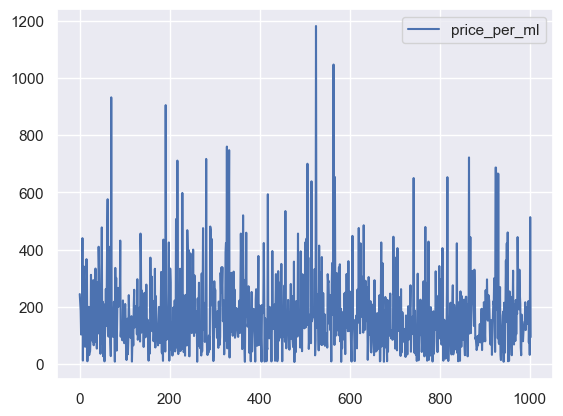

In [175]:
price_df.plot()

In [ ]:
price_df.describe()

,price_per_ml
count,1003.000000
mean,1.749847
std,1.350871
min,0.072500
25%,0.875000
50%,1.466000
75%,2.221667
max,11.813333


In [ ]:
price_df.describe()

,price_per_ml
count,1003.000000
mean,1.749847
std,1.350871
min,0.072500
25%,0.875000
50%,1.466000
75%,2.221667
max,11.813333


In [ ]:
price_per_ml = df['new_price']/df['ml']
price_per_ml


0       2.445500
1       2.159000
2       1.869000
3       1.032000
4       1.899000
          ...   
998     0.750000
999     1.537500
1000    0.322034
1001    5.133333
1002    0.942000
Length: 1003, dtype: float64

In [ ]:
price_per_ml.describe()

count    1003.000000
mean        1.749847
std         1.350871
min         0.072500
25%         0.875000
50%         1.466000
75%         2.221667
max        11.813333
dtype: float64

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

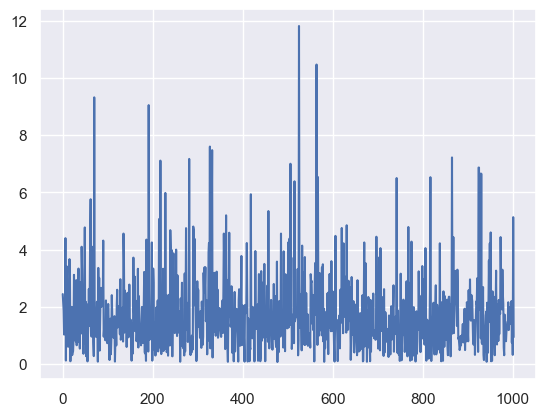

In [ ]:
price_per_ml.plot()